In [2]:
import zipfile
import os

zip_file_path = '/content/drive/My Drive/archive (7).zip'  # Adjust the path accordingly
destination_folder = '/content/Animals'

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Extracted files to: {destination_folder}")


Extracted files to: /content/Animals


In [3]:
data_dir='/content/Animals/animal_data'

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms,datasets
from torch.utils.data import DataLoader,random_split
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [6]:
dataset=datasets.ImageFolder(root=data_dir,transform=data_transform)

In [8]:
train_len=int(0.8*len(dataset))
test_len=len(dataset)-train_len
train_dataset,test_dataset=random_split(dataset,[train_len,test_len])

In [9]:
train_loader=DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=32,shuffle=True)

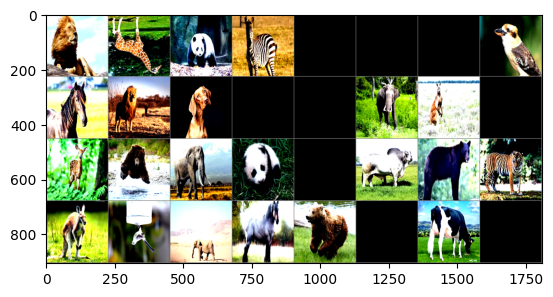

Lion  Giraffe Panda Zebra Dolphin Tiger Giraffe Bird  Horse Lion  Dog   Bird  Deer  Elephant Kangaroo Dog   Deer  Bear  Elephant Panda Giraffe Cow   Bear  Tiger Kangaroo Bird  Elephant Horse Bear  Bear  Cow   Giraffe


In [11]:
def imshow (img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()


dataiter=iter(train_loader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{dataset.classes[labels[j]]:5}' for j in range(32)))


In [15]:
class_names=train_dataset.dataset.classes
num_classes=len(class_names)

In [16]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN,self).__init__()
        self.conv1=nn.Conv2d(3,32,kernel_size=3,padding=1)
        self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
        self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)
        self.pool=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(128*28*28,512)
        self.fc2=nn.Linear(512,128)
        self.fc3=nn.Linear(128,num_classes)

    def forward(self,x):
      x=self.pool(torch.relu(self.conv1(x)))
      x=self.pool(torch.relu(self.conv2(x)))
      x=self.pool(torch.relu(self.conv3(x)))
      x=torch.flatten(x,1)
      x=torch.relu(self.fc1(x))
      x=torch.relu(self.fc2(x))
      x=self.fc3(x)

      return x

model=CustomCNN().to(device)



In [18]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [24]:
num_epochs=10
for epoch in range(num_epochs):
  model.train()
  running_loss=0.0
  total=0
  correct=0
  for images,labels in train_loader:
    images=images.to(device)
    labels=labels.to(device)
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

  epoch_loss=running_loss/len(train_loader)
  epoch_acc=correct/total
  print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

Epoch 1/10, Loss: 0.0831, Accuracy: 0.9775
Epoch 2/10, Loss: 0.0552, Accuracy: 0.9826
Epoch 3/10, Loss: 0.0574, Accuracy: 0.9859
Epoch 4/10, Loss: 0.0563, Accuracy: 0.9884
Epoch 5/10, Loss: 0.1177, Accuracy: 0.9659
Epoch 6/10, Loss: 0.0693, Accuracy: 0.9839
Epoch 7/10, Loss: 0.0167, Accuracy: 0.9961
Epoch 8/10, Loss: 0.0086, Accuracy: 0.9981
Epoch 9/10, Loss: 0.0025, Accuracy: 1.0000
Epoch 10/10, Loss: 0.0010, Accuracy: 1.0000


In [25]:
model.eval()
total=0
correct=0
with torch.no_grad():
  for images,labels in test_loader:
    images=images.to(device)
    labels=labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(labels==predicted).sum().item()
  test_acc=correct/total
  print(f'Test Accuracy: {test_acc:.4f}')


Test Accuracy: 0.8021
